<a href="https://colab.research.google.com/github/PitonWuk/WAG/blob/main/module2/%D0%94%D0%97_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів та даних

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/possum.csv")

In [3]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


# Завдання 1
Виведіть основні числові характеристики для числових ознак

In [4]:
data = df.describe()
print(data)

             case        site         age     hdlngth      skullw    totlngth  \
count  104.000000  104.000000  102.000000  104.000000  104.000000  104.000000   
mean    52.500000    3.625000    3.833333   92.602885   56.883654   87.088462   
std     30.166206    2.349086    1.909244    3.573349    3.113426    4.310549   
min      1.000000    1.000000    1.000000   82.500000   50.000000   75.000000   
25%     26.750000    1.000000    2.250000   90.675000   54.975000   84.000000   
50%     52.500000    3.000000    3.000000   92.800000   56.350000   88.000000   
75%     78.250000    6.000000    5.000000   94.725000   58.100000   90.000000   
max    104.000000    7.000000    9.000000  103.100000   68.600000   96.500000   

            taill    footlgth    earconch         eye       chest       belly  
count  104.000000  103.000000  104.000000  104.000000  104.000000  104.000000  
mean    37.009615   68.459223   48.130769   15.046154   27.000000   32.586538  
std      1.959518    4.395306 

# Завдання 2
Проаналізуйте стовпчик `case`, чи є він інформативним?

In [5]:
case_counts = df['case'].value_counts()

print("Унікальні значення та їх частота у стовпці 'case':")
print(case_counts)

# Визначення інформативності
if case_counts.nunique() == len(case_counts):
    print("\nСтовпець 'case' є інформативним, оскільки містить унікальні значення для кожного спостереження.")
else:
    print("\nСтовпець 'case' не є інформативним, оскільки містить дублікати або некорисну інформацію.")

Унікальні значення та їх частота у стовпці 'case':
1      1
2      1
77     1
76     1
75     1
      ..
32     1
31     1
30     1
29     1
104    1
Name: case, Length: 104, dtype: int64

Стовпець 'case' не є інформативним, оскільки містить дублікати або некорисну інформацію.


# Завдання 3
Очистіть дані від викидів. Виведіть очищений датафрейм

In [6]:
def remove(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


cleaned_df = df.copy()
numeric_columns = df.select_dtypes(include='number').columns
for column in numeric_columns:
    cleaned_df = remove(cleaned_df, column)

print(cleaned_df)

     case  site    Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0       1     1    Vic   m  8.0     94.1    60.4      89.0   36.0      74.5   
1       2     1    Vic   f  6.0     92.5    57.6      91.5   36.5      72.5   
2       3     1    Vic   f  6.0     94.0    60.0      95.5   39.0      75.4   
3       4     1    Vic   f  6.0     93.2    57.1      92.0   38.0      76.1   
4       5     1    Vic   f  2.0     91.5    56.3      85.5   36.0      71.0   
..    ...   ...    ...  ..  ...      ...     ...       ...    ...       ...   
99    100     7  other   m  1.0     89.5    56.0      81.5   36.5      66.0   
100   101     7  other   m  1.0     88.6    54.7      82.5   39.0      64.4   
101   102     7  other   f  6.0     92.4    55.0      89.0   38.0      63.5   
102   103     7  other   m  4.0     91.5    55.2      82.5   36.5      62.9   
103   104     7  other   f  3.0     93.6    59.9      89.0   40.0      67.6   

     earconch   eye  chest  belly  
0        54.5  

# Завдання 4
Намалюйте матрицб кореляцій. Для найбільш корельованих ознак намалюйте точкову діаграму.

<ipython-input-8-f13956b0be80>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


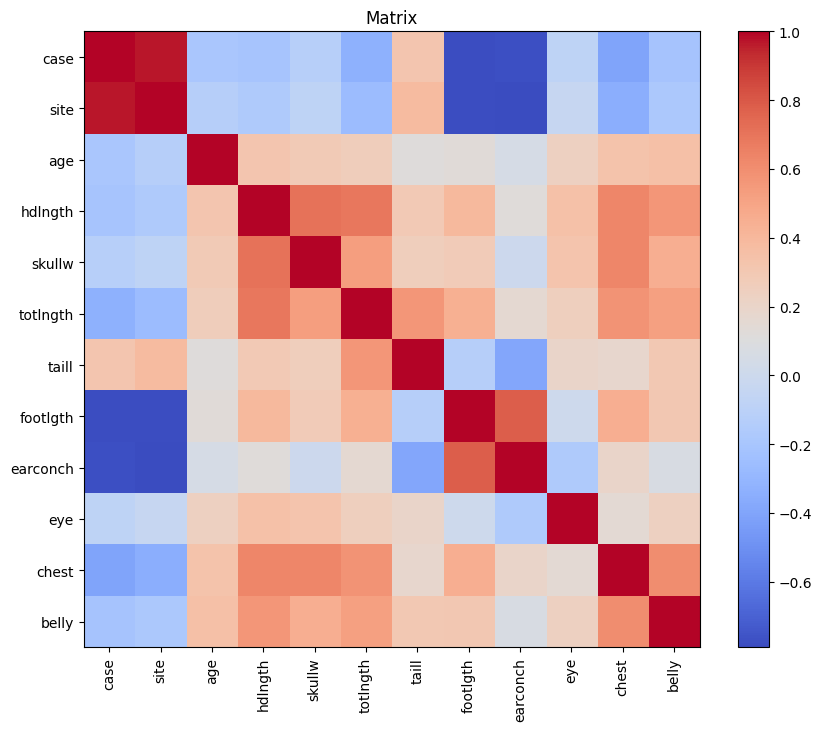

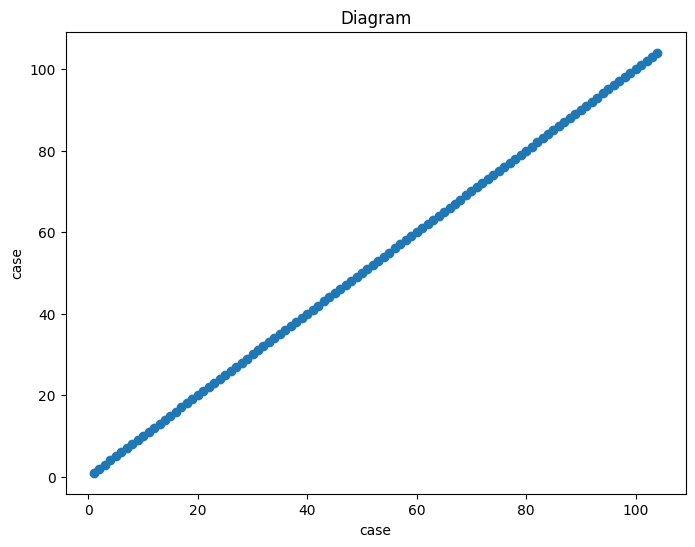

In [8]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.title('Matrix')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

most_correlated_features = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()[:2].index.tolist()

plt.figure(figsize=(8, 6))
plt.scatter(df[most_correlated_features[0][0]], df[most_correlated_features[0][1]])
plt.title('Diagram')
plt.xlabel(most_correlated_features[0][0])
plt.ylabel(most_correlated_features[0][1])
plt.show()

# Завдання 5
Для 4-ох числових ознак на вибір намалюйте ящики з вусами згрупованими по статі. Подумайте чи є вплив статі на розміри опосума

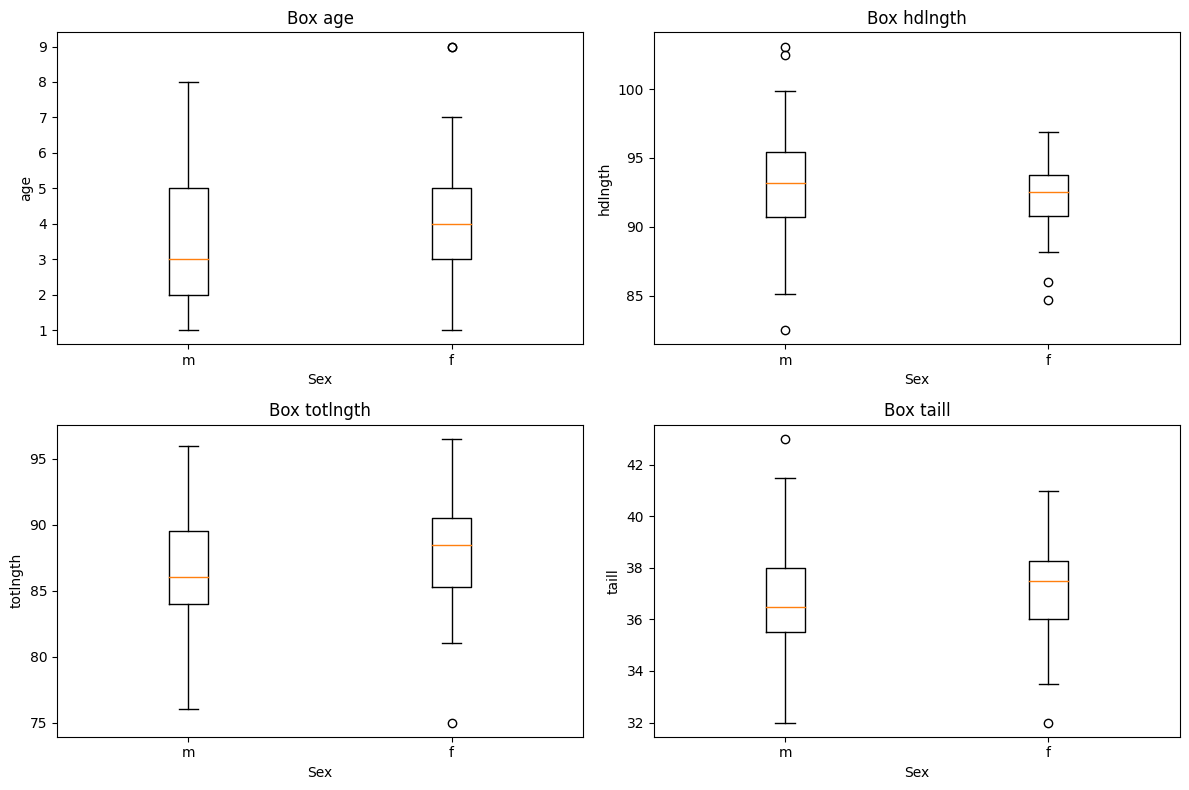

In [9]:
numeric_features = ['age', 'hdlngth', 'totlngth', 'taill']
sexes = df['sex'].unique()

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)
    box_data = [df[df['sex'] == sex][feature].dropna() for sex in sexes]
    plt.boxplot(box_data, labels=sexes)
    plt.title(f'Box {feature}')
    plt.xlabel('Sex')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()